# Aprendizaje No Supervizado - Cluster

* Ejemplo
* Algo de Teoría
* ¿Cuantos cluster son importantes?
* Temas relacionados

## Cluster

Los "Cluster" o Aglomerados es un proceso de **"agrupar"** aquellos objetos que sean **similares**. Pensando en la matrix de datos que guarda la información de los clientes de un negocio, como la siguiente:


$$\mathbf{X} = \begin{bmatrix}
    ID00111402 & M & 5.7 &  11 \\
    ID00101301 & F & 8.9 &  25 \\
    \vdots & \vdots & \vdots & \ddots \\
    ID00111410 & M & 6 & 24
\end{bmatrix}.$$


Los números "$ID...$" se refieren al número de cliente, la segunda columna al genero y las otros columnas pueden ser datos correspondientes a ciertas variables que indican sus compras y cantidad de productos. Observando con cuidado a los 3 clientes, se observa que el primero y último tienen el mismo género y un valor cercano de la primera variable.

Intuitivamente los pocos datos que se ven podrían hacer creer que el primero y el último cliente son más "similares" que el primero  y el segundo cliente. Lo sutíl es el módo de definir cuándo dos clientes son considerados "similares".

Lo que aborda esta ténica es usar una medida de similaridad para poder ir agrupando los datos.

La siguiente gráfica muestra como se relacionan dos variables y a simple vista no se ve mayor relación entre los datos. 

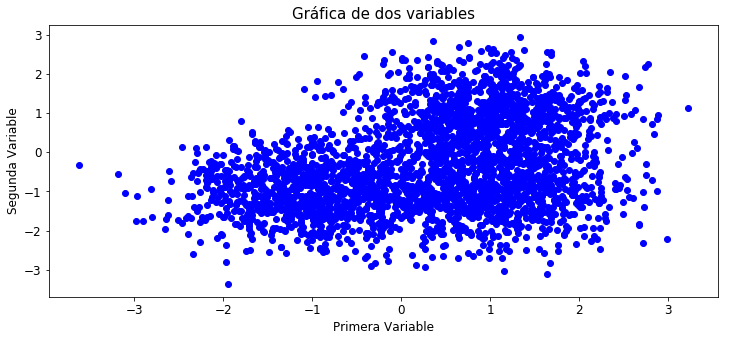

In [1]:
%run Script/Cluster_1.py

Uno puede preguntarse si existen parejas de puntos que sean más **similares**, para este caso consideramos como una medida de similaridad la *distancia Euclideana*: $$d((x_1,x_2),(y_1,y_2))= \sqrt{(x_1-y_1)^2+(x_2-y_2)^2} $$

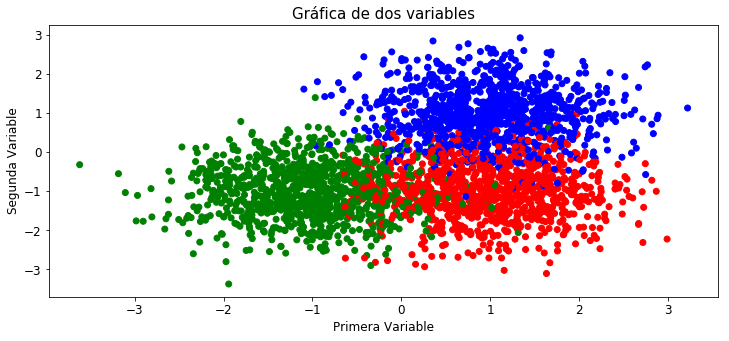

In [17]:
%run Script/Cluster_2.py

La primera imagen no muestra una relación clara o una cantidad de grupos entre los datos, la segunda gráfica muestra qué considerando la distancia euclideana entre cada pareja de puntos se muestra la existencia de 3 grupos de datos.

Ese es el objetivo central de todas las técnicas de Cluster, tratar de encontrar *cúmulos de datos que puedan ser segmentados*.

## Ejemplo

Los datos del siguiente ejemplo son los correpondientes a la [KDD Cup](http://www.kdd.org/), una competencia realizada en 1999 sobre la detección de intrusiones a una red. Estos datos cuentan con más de **4 millones** de registros. Para facilitar y poder replicar el ejercicio, en caso de que se cuenta con ciertas limitantes de computo, solo se consideran 2 millones de registros.

Los datos se encuentran en el directorio DataSets, pero se pueden directamente descargar [aquí](http://kdd.ics.uci.edu/databases/kddcup99/kddcup99.html).

Para conocer más detalles sobre los datos se puede leer el artículo:
[*Cost-based Modeling and Evaluation for Data Mining With Application to Fraud and Intrusion Detection: Results from the JAM Project by Salvatore J. Stolfo, Wei Fan, Wenke Lee, Andreas Prodromidis, and Philip K. Chan*](https://pdfs.semanticscholar.org/7334/806e28edef38aadcc0a52e1b016dfae5fff6.pdf)

In [3]:
#Entono para exploració y tratamiento de los datos
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#configuracion Matplotlib
plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15

#Carga de Datos
Datos=pd.read_table("DataSets/kddcup.data.txt",sep=',',quotechar= '.',header=None,prefix='X',nrows=2000000)

Se revisa el tamaño de la muestra de datos.

In [4]:
# Se verifica la muestra de datos
Datos.shape

(2000000, 42)

Se visualizan los datos.

In [5]:
# Se visualizan los primeros 5 registros 
Datos.head()

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41
0,0,tcp,http,SF,215,45076,0,0,0,0,...,0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,162,4528,0,0,0,0,...,1,1.0,0.0,1.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,236,1228,0,0,0,0,...,2,1.0,0.0,0.50,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,233,2032,0,0,0,0,...,3,1.0,0.0,0.33,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,239,486,0,0,0,0,...,4,1.0,0.0,0.25,0.0,0.0,0.0,0.0,0.0,normal.


Para tratar de conocer las muestras de datos, es importante revisar el tipo de variables que se tienen.

In [56]:
# Se revisa el tipo de variables
Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 42 columns):
X0     int64
X1     object
X2     object
X3     object
X4     int64
X5     int64
X6     int64
X7     int64
X8     int64
X9     int64
X10    int64
X11    int64
X12    int64
X13    int64
X14    int64
X15    int64
X16    int64
X17    int64
X18    int64
X19    int64
X20    int64
X21    int64
X22    int64
X23    int64
X24    float64
X25    float64
X26    float64
X27    float64
X28    float64
X29    float64
X30    float64
X31    int64
X32    int64
X33    float64
X34    float64
X35    float64
X36    float64
X37    float64
X38    float64
X39    float64
X40    float64
X41    object
dtypes: float64(15), int64(23), object(4)
memory usage: 640.9+ MB


Se observa que se tienen 4 variables que son "cadenas" (tipo object de numpy), para el ejemplo no se van a considerar estas variables. Pero se puede usar alguna de esas variables como guía para explorar la elección de los cluster.

Pese a no considerar esas 4 variables, se puede revisar el tipo de datos a los que se refieren esas variables.

In [57]:
# Se vizualidan las 10 categorías de la variable X41
Datos.X41.value_counts()[:10]

smurf.          839558
normal.         712267
neptune.        411215
satan.           15878
ipsweep.          8602
portsweep.        6391
nmap.             2316
back.             2103
warezclient.      1020
teardrop.          397
Name: X41, dtype: int64

In [58]:
# La variable X1 cuenta con menos categorías
Datos.X1.value_counts()

tcp     1072989
icmp     854482
udp       72529
Name: X1, dtype: int64

In [59]:
# Se eligen solo las primeras 10 categorías de la variable X2
Datos.X2.value_counts()[:10]

ecr_i       842210
http        532677
private     411928
smtp         68415
domain_u     47090
ftp_data     28260
other        21343
eco_i        11538
finger        4511
ftp           3599
Name: X2, dtype: int64

In [60]:
# La variable X3 cuenta con 11 categorías
Datos.X3.value_counts()

SF        1532771
S0         413441
REJ         45418
RSTR         6001
SH           1039
RSTO          625
S1            412
S2            122
RSTOS0        112
S3             40
OTH            19
Name: X3, dtype: int64

Se toman las variables que se consideran para el ejemplo, lo cual implica que se eliminan las 4 variables y la variable **X0** la cual funciona como índice, por lo cual no es necesaria. 

In [6]:
#Se crea la nueva muestra de datos, solo con variables numéricas
Datos_C=Datos.iloc[:,~ Datos.columns.isin(['X0','X1','X2','X3','X41'])]

In [7]:
#El tamaño de la muestra es:
Datos_C.shape

(2000000, 37)

Se calculan 2 y 3 cluster con el algoritmo KMeans. Considerando que los datos corresponden a 3 Protocolos de Comunicación reportados en la Variable **X1**, probamos como se comportan los grupos detectados con respecto a los protocolos.

In [8]:
from sklearn.cluster import KMeans

#Cálculo de 2 Cluster
kmeans_2 = KMeans(n_clusters=2, random_state=42)
K_2=kmeans_2.fit_predict(Datos_C)

#Cálculo de 3 Cluster
kmeans_3 = KMeans(n_clusters=3, random_state=42)
K_3=kmeans_3.fit_predict(Datos_C)

In [9]:
#Las etiquetas asignadas por los dos cluster calculados fueron 0/1
pd.crosstab(K_2,Datos.X1)

X1,icmp,tcp,udp
row_0,,,
0,854482,1072988,72529
1,0,1,0


In [10]:
#Las etiquetas asignadas por los dos cluster calculados fueron 0/1/2
pd.crosstab(K_3,Datos.X1)

X1,icmp,tcp,udp
row_0,,,
0,854482,1072987,72529
1,0,1,0
2,0,1,0


Las dos tablas muestran qué se detecta solo un registros fuera de los dos cluster y para el caso del cálculo de 3 cluster, se detectan 2 registros "raros".

Pensando en qué se desea detectar alguna intrucción a la red, con los anterior ejemplo. Podría parecer que solo ocurrieron unos cuentos ingresos extraños. Los cuales fueron detectados mediante el calculo de los Cluster mediante el algoritmo de Kmean.

## Algo de Teoría

En la instroducción se mencionó que lo importante en este tipo de algoritmos es definir una medida de *similaridad*. Este concepto está relacionado con la definición de *distancia o métrica*. Formalmente la *distancia* se define como:
* $D(x,x)=0\space \forall x \in \mathbf{X}$
* $D(x,y)=D(y,x)\geq \space \forall x,y \in \mathbf{X}$
* $D(x,z)\leq D(x,y) + D(y,z) \space \forall x,y,z \in \mathbf{X}$

Donde consideramos a $\mathbf{X}$ como el conjunto de variables, en el ejemplo anterior sería cada registro de los ingresos a la red. Cuando la tercera condición (desigualdad del trángulo) no se cumple, se llama *similaridad*.

Otro aspecto importante es cómo definir cuándo se forman los cluster o aglomerados de los datos. Para esto existen diversos algoritmos, el usado en los ejemplos fue [**Kmean**](). El algoritmo es el siguiente:

* Etapa 1:
  * Se elige el número **k** de cluster
  * Se eligen **k** puntos aleatorios
  * Se asigna un *centroide* $\mu_j$ a esos **k** puntos
  
* Etapa 2: 
  * Para cada punto $x_i$:
      * Se calcula la distancia a cada centro del cluster
      * Se asigna $x_i$ al grupo o cluster más cercano por la distancia $d_i=min d(x_i,\mu_j)$
* Etapa 3: 
   * Para cada *centroide*:
      * Se actualiza el valor del centroide $$\mu_j=\frac{1}{N_j}\sum_{i=1}x_i$$
      
Se repite el paso 2 y 3 hasta que ya no se modifican los centroides.     

Las imagenes iniciales muestran es estado inicia y final del algoritmo, pero se observar algunos puntos verdes, rojos y azules que parecieran quedar lejos de centroides o centros de los cluster que les corresponderían.

Se observa que la medida de similaridad o la distancia, resultan claves para el algoritmo. Si uno toma los datos y aplica el mismo algoritmo con diferentes métricas y la misma cantidad de cluster a buscar, es muy posible que se segmenten algunos datos de manera diferentes. 

## ¿Cuántos Cluster Elegir?

En los ejemplos se han elegido 2 o 3 algoritmos. Eso no indica que sea la cantidad adecuada o qué se haya probado de algún modo cual sería el número de cluster adecuados a calcular. En el algoritmo se tienen la libertad de elegir el número **k** de cluster.

Hay diferentes métodos y pruebas para elegir el número más óptimo, al final lo que se desea es que los cluster sean lo más definidos posibles.

Si en el primer ejemplo se buscan 3, 4 y 6 cluster, el comportamiento se vería de la siguiente manera:

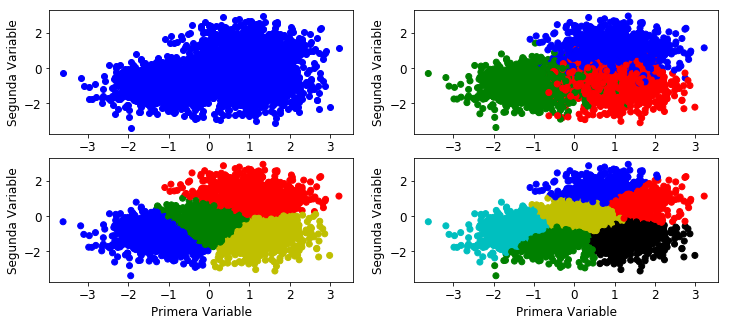

In [2]:
%run Script/Cluster_3.py

Los gráficos no muestran claramente cuál es la cantidad correcta de cluster a elegir. Un método estandar  y sencillo es el **"método del codo" o "Elbow Method"**. Mediante este se trata de detectar el número óptimo de cluster a elegir.

Para ejemplificar el método se generan los datos con 3 cluster y se calculan varios Kmeans desde 1 hasta 10.

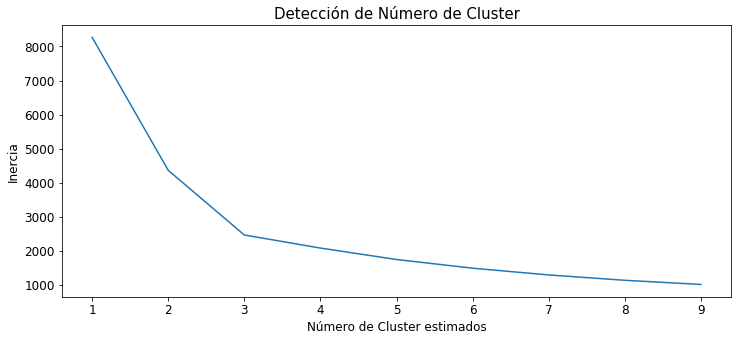

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans


plt.rcParams["figure.figsize"] = (12, 5)
plt.rcParams['figure.titlesize'] = 'large'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.titlesize']=15


np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

km = [KMeans(n_clusters=i) for i in range(1,10)]
score = [km[i].fit(X).score(X) for i in range(len(km))]
cluster_array = [km[i].inertia_ for i in range(len(score))]

plt.plot(range(1,10),cluster_array)
plt.title("Detección de Número de Cluster")
plt.ylabel("Inercia")
plt.xlabel("Número de Cluster estimados")
plt.show()

Se observa el cambio brusco en el **número 3**, lo cual coincide con la cantidad de centros que tienen la muestra. Después de 3, decae casi linealmente. 

Aplicando el criterio del códo a los datos `Datos_C` para tratar de buscar un buen valor de k, resulta computacionalmente costoso. Pero el código para estimar los primeros 20 cluster es el siguiente:

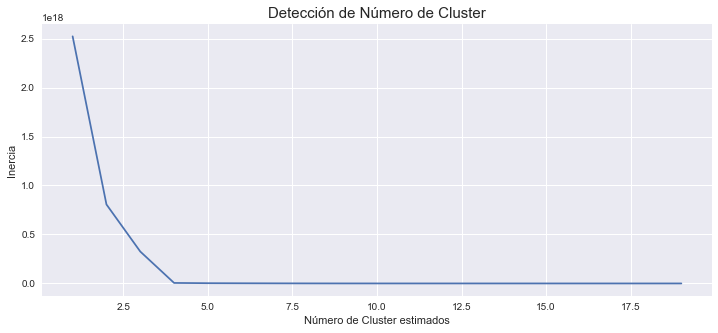

In [66]:
#Aplicando a la muestra de datos del ejemplo de intruccion a una red.

km = [KMeans(n_clusters=i) for i in range(1,20)]
score = [km[i].fit(Datos_C).score(Datos_C) for i in range(len(km))]
cluster_array = [km[i].inertia_ for i in range(len(score))]

plt.plot(range(1,20),cluster_array)
plt.title("Detección de Número de Cluster")
plt.ylabel("Inercia")
plt.xlabel("Número de Cluster estimados")
plt.show()

En este último ejemplo se visualiza que posiblemente sean **4** el número de cluster adecuados para los datos del ejemplo. El cálculo es el siguiente:

In [11]:
from sklearn.cluster import KMeans

#Cálculo de 2 Cluster
kmeans_4 = KMeans(n_clusters=4, random_state=42)
K_4=kmeans_4.fit_predict(Datos_C)
#Las etiquetas asignadas por los dos cluster calculados fueron 0/1
pd.crosstab(K_4,Datos.X1)

X1,icmp,tcp,udp
row_0,,,
0,854482,1072985,72529
1,0,1,0
2,0,1,0
3,0,2,0


Al calcular los 4 cluster se detecan 4 elementos fuera asilados con un tipo de conexión **tcp**. El método del codo no es el único método para valorar la cantidad o la calidad de los cluster. 

La idea más sencilla para valorar la calidad de los cluster es considerando que los centros de los cluster son menos dispersos; es decir, la distancia de lo centros a los puntos clasificador es la menor posible. 

## Temas Relacionados

En el ejemplo se usa **Kmean** como algoritmo, pero existen más y según el tipo de datos puede resultar adecuados mejor uno u otro algoritmo. La siguiente imagen muestra como reacciona cada uno de los algoritmo ante una muestra de datos mezclada de manera compleja.

&nbsp;


![Cluster](Figuras/cluster_comparison.png)

# Ejercicios